In [1]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\harih\anaconda3\python.exe -m pip install --upgrade pip


# Step 1: Define the Problem

To predict the disease by symptoms and recommend the precaustions

# Step 2: Dataset Collection

In [1]:

import  pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/Dataset.csv')

df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


# Step 3: Model Development

1. Data Preprocessing:

In [3]:
x = df.drop('prognosis', axis=1)
y = df['prognosis']

l = LabelEncoder()
l.fit(y)
y = l.transform(y)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

SVC Accuracy: 1.0 

SVC Confusion Matrix: 

[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


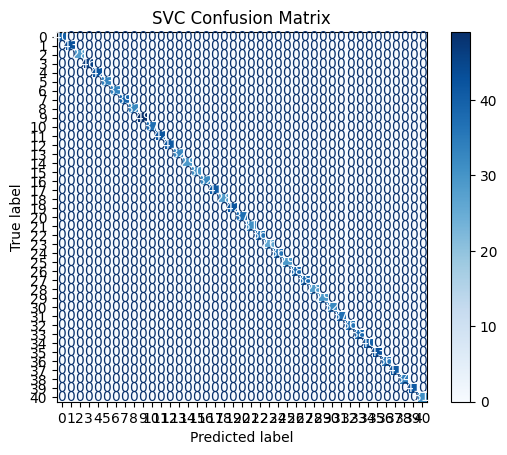

RandomForest Accuracy: 1.0 

RandomForest Confusion Matrix: 

[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


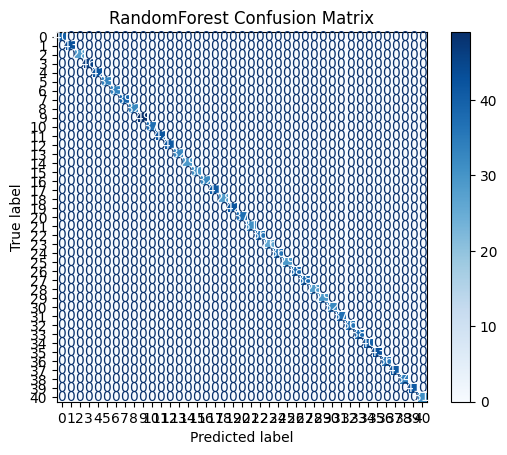


Best Model: SVC with Accuracy: 1.0

Best model saved as SVC_best_model.pkl


In [5]:

import joblib

models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
}

best_model = None
best_accuracy = 0
best_model_instance = None  

for name, model in models.items():
    model.fit(x_train, y_train) 
    test_predictions = model.predict(x_test)  

    model_accuracy = accuracy_score(y_test, test_predictions)  
    print(f"{name} Accuracy: {model_accuracy} \n")

    cm = confusion_matrix(y_test, test_predictions)
    print(f"{name} Confusion Matrix: \n")
    print(np.array2string(cm, separator=', '))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    if model_accuracy > best_accuracy:
        best_accuracy = model_accuracy
        best_model = name
        best_model_instance = model

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy}")

joblib.dump(best_model_instance, f'{best_model}_best_model.pkl')
print(f"\nBest model saved as {best_model}_best_model.pkl")


In [7]:
print("Disease Predicted :",model.predict(x_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

Disease Predicted : [40]
Actual Disease : 40


c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Supporting Datasets

In [8]:
symptoms_df = pd.read_csv("dataset/symptoms_df.csv")
precautions = pd.read_csv("dataset/precautions_df.csv")
medications = pd.read_csv('dataset/medications.csv')
description = pd.read_csv("dataset/description.csv")
workout = pd.read_csv("dataset/workout_df.csv")
diets = pd.read_csv("dataset/diets.csv")


In [9]:

symptoms_list = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'}

symptoms_list_processed = {symptom.replace('_', ' ').lower(): value for symptom, value in symptoms_list.items()}

def information(predicted_dis):
    disease_description = description[description['Disease'] == predicted_dis]['Description']
    disease_description = " ".join([w for w in disease_description])

    disease_precautions = precautions[precautions['Disease'] == predicted_dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    disease_precautions = [col for col in disease_precautions.values]

    disease_medications = medications[medications['Disease'] == predicted_dis]['Medication']
    disease_medications = [med for med in disease_medications.values]

    disease_diet = diets[diets['Disease'] == predicted_dis]['Diet']
    disease_diet = [die for die in disease_diet.values]

    disease_workout = workout[workout['disease'] == predicted_dis] ['workout']
    disease_workout = [work for work in disease_workout.values]

    return disease_description, disease_precautions, disease_medications, disease_diet, disease_workout



In [10]:

import pickle
pickle.dump(model,open('SVC_best_model.pkl','wb'))
svc = pickle.load(open('SVC_best_model.pkl','rb'))


In [11]:
def predicted_value(patient_symptoms,model):
    i_vector = np.zeros(len(symptoms_list_processed))
    for i in patient_symptoms:
        i_vector[symptoms_list_processed[i]] = 1
    return diseases_list[model.predict([i_vector])[0]]

In [12]:
from fuzzywuzzy import process

def correct_spelling(symptom):
    matched_symptom, score = process.extractOne(symptom, list(symptoms_list_processed.keys()))
    if score >= 80:
        return matched_symptom
    else:
        return None

c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [13]:
symptoms = input("symptoms: ")
patient_symptoms = [s.strip() for s in symptoms.split(',')]  
print("Your Symptoms: ",patient_symptoms)

corrected_symptoms = []
for symptom in patient_symptoms:
    corrected_symptom = correct_spelling(symptom.lower())
    if corrected_symptom:
        corrected_symptoms.append(corrected_symptom)
    else:
        print(f"Symptom '{symptom}' not found in the database.")


if corrected_symptoms:
    predicted_disease = predicted_value(corrected_symptoms,svc)
    disease_description, disease_precautions, disease_medications, disease_diet, disease_workout = information(predicted_disease)

    print("\nPredicted Disease:", predicted_disease)
    
    print("\nDescription:")
    print(disease_description)

    print("\nPrecautions:")
    for idx, precaution in enumerate(disease_precautions[0], start=1):
        print(f"{idx}. {precaution}")

    print("\nMedications:")
    for idx, medication in enumerate(disease_medications, start=1):
        print(f"{idx}. {medication}")

    print("\nDo and Don't:")
    for idx, workout in enumerate(disease_workout, start=1):
        print(f"{idx}. {workout}")

    print("\nDiets:")
    for idx, diet in enumerate(disease_diet, start=1):
        print(f"{idx}. {diet}")

Your Symptoms:  ['chills', 'vomiting', 'acidity', 'stomach_pain']

Predicted Disease: GERD

Description:
GERD (Gastroesophageal Reflux Disease) is a digestive disorder that affects the lower esophageal sphincter.

Precautions:
1. avoid fatty spicy food
2. avoid lying down after eating
3. maintain healthy weight
4. exercise

Medications:
1. ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers', 'Antacids', 'Prokinetics', 'Antibiotics']

Do and Don't:
1. Consume smaller meals
2. Avoid trigger foods (spicy, fatty)
3. Eat high-fiber foods
4. Limit caffeine and alcohol
5. Chew food thoroughly
6. Avoid late-night eating
7. Consume non-citrus fruits
8. Include lean proteins
9. Stay hydrated
10. Avoid carbonated beverages

Diets:
1. ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger', 'Licorice', 'Aloe vera juice']


c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
